In [1]:
#!pip install fbprophet
#!pip install scikit-learn==0.24
#!pip install nb_black

In [2]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [3]:
#%load_ext nb_black

In [112]:
df = pd.read_csv(r'C:\Users\DaviMonteiroPaulelli\Box Sync\Python_Scripts\Projeto_Oi_Tahto\Bases\SQLAExport_1231.csv', delimiter = ';')

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df["DT_DATA"] = df["DT_DATA"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
df.head(1)

,DT_DATA,NO_SETOR,NU_RECEBIDA,NU_ATENDIDA,NU_TMA,NU_TME,NU_NS_20,NU_ATENDIDA_20,NU_ABANDONADA_20
0,2018-04-25,SAC TRIPLE PLAY,878,807,"222,068153655514","54,0683371298405","0,684994272623139",598,5


In [113]:
df['NO_SETOR'].value_counts()

SAC TRIPLE PLAY    2428
Name: NO_SETOR, dtype: int64

In [114]:
df = df.groupby(['DT_DATA']).agg({'NU_TMA':'sum'}).reset_index()
df.head()

,DT_DATA,NU_TMA
0,2015-01-01,"372,045454545455"
1,2015-01-02,"392,630434782609"
2,2015-01-03,"291,157894736842"
3,2015-01-04,"236,076923076923"
4,2015-01-05,"382,64"


In [115]:
df.columns = ['ds','y']

In [116]:
# Tirando a vírgula e transformando em float
df["y"] = df["y"].replace({",": "."}, regex=True).astype("float")

In [117]:
df['ds'].min()

Timestamp('2015-01-01 00:00:00')

In [118]:
df['ds'].max()

Timestamp('2021-09-15 00:00:00')

In [119]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [120]:
m = Prophet(interval_width = 0.95)
m.add_country_holidays(country_name="BR")
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
future = m.make_future_dataframe(periods=45,freq = 'D')

In [122]:
df.tail()

,ds,y
2423,2021-09-11,511.167
2424,2021-09-12,515.038
2425,2021-09-13,508.245
2426,2021-09-14,511.986
2427,2021-09-15,518.193


In [123]:
future.tail()

,ds
2468,2021-10-26
2469,2021-10-27
2470,2021-10-28
2471,2021-10-29
2472,2021-10-30


In [124]:
len(df)

2428

In [125]:
len(future)

2473

### Step 2: Predict and fill in the Future

In [126]:
forecast = m.predict(future)

In [127]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Souls' Day,All Souls' Day_lower,All Souls' Day_upper,Christmas,Christmas_lower,Christmas_upper,Independence Day,Independence Day_lower,Independence Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Our Lady of the Apparition,Our Lady of the Apparition_lower,Our Lady of the Apparition_upper,Republic Proclamation Day,Republic Proclamation Day_lower,Republic Proclamation Day_upper,Tiradentes,Tiradentes_lower,Tiradentes_upper,Worker's Day,Worker's Day_lower,Worker's Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,336.964,269.482,457.721,336.964,336.964,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,19.686,19.686,19.686,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.282,26.282,26.282,19.686,19.686,19.686,8.994,8.994,8.994,-2.398,-2.398,-2.398,0.000,0.000,0.000,363.246
1,2015-01-02,336.383,248.144,434.791,336.383,336.383,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.560,3.560,3.560,0.000,0.000,0.000,5.871,5.871,5.871,-2.310,-2.310,-2.310,0.000,0.000,0.000,339.943
2,2015-01-03,335.802,242.681,419.542,335.802,335.802,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-5.949,-5.949,-5.949,0.000,0.000,0.000,-3.941,-3.941,-3.941,-2.008,-2.008,-2.008,0.000,0.000,0.000,329.853
3,2015-01-04,335.221,220.404,395.319,335.221,335.221,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-25.042,-25.042,-25.042,0.000,0.000,0.000,-23.542,-23.542,-23.542,-1.500,-1.500,-1.500,0.000,0.000,0.000,310.179
4,2015-01-05,334.641,248.265,426.510,334.641,334.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.649,4.649,4.649,0.000,0.000,0.000,5.450,5.450,5.450,-0.802,-0.802,-0.802,0.000,0.000,0.000,339.289


In [128]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'All Souls' Day', 'All Souls' Day_lower', 'All Souls' Day_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'Independence Day',
       'Independence Day_lower', 'Independence Day_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper',
       'Our Lady of the Apparition', 'Our Lady of the Apparition_lower',
       'Our Lady of the Apparition_upper', 'Republic Proclamation Day',
       'Republic Proclamation Day_lower', 'Republic Proclamation Day_upper',
       'Tiradentes', 'Tiradentes_lower', 'Tiradentes_upper', 'Worker's Day',
       'Worker's Day_lower', 'Worker's Day_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       

In [129]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
2461,2021-10-19,492.821,404.558,575.501
2462,2021-10-20,499.603,417.510,585.101
2463,2021-10-21,502.847,416.328,592.412
2464,2021-10-22,500.653,415.851,587.913
2465,2021-10-23,491.823,401.221,581.544
2466,2021-10-24,473.229,376.095,566.849
2467,2021-10-25,503.227,410.413,594.965
2468,2021-10-26,499.321,418.407,587.797
2469,2021-10-27,506.278,413.155,593.598
2470,2021-10-28,509.519,419.775,598.913


### Plotting Forecast

We can use Prophet's own built in plotting tools

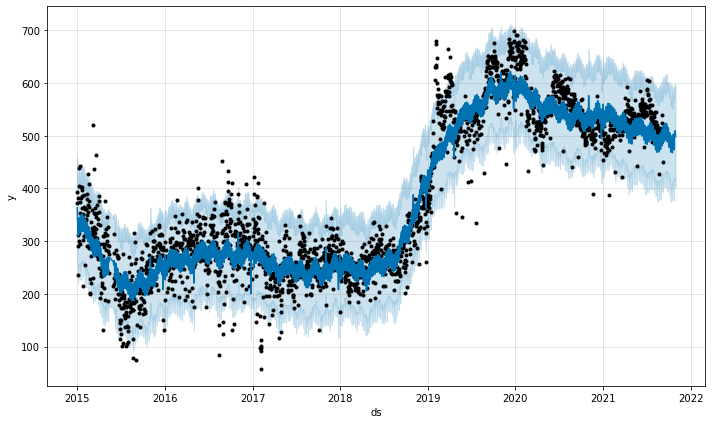

In [130]:
m.plot(forecast);

(array(17897.), array(18628.))

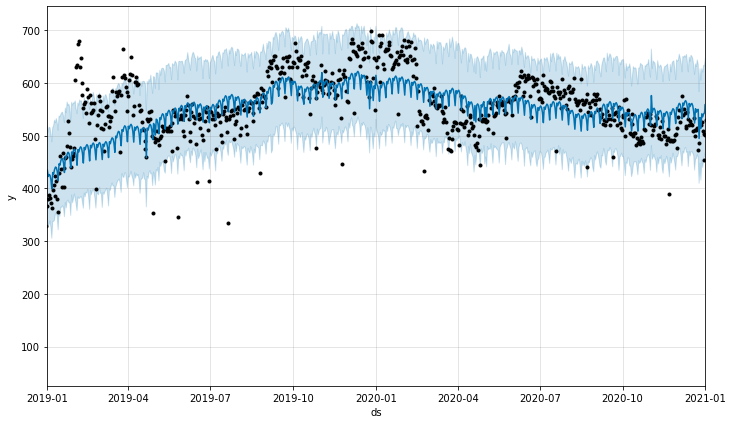

In [131]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2019-01-01','2021-01-01')

<AxesSubplot:xlabel='ds'>

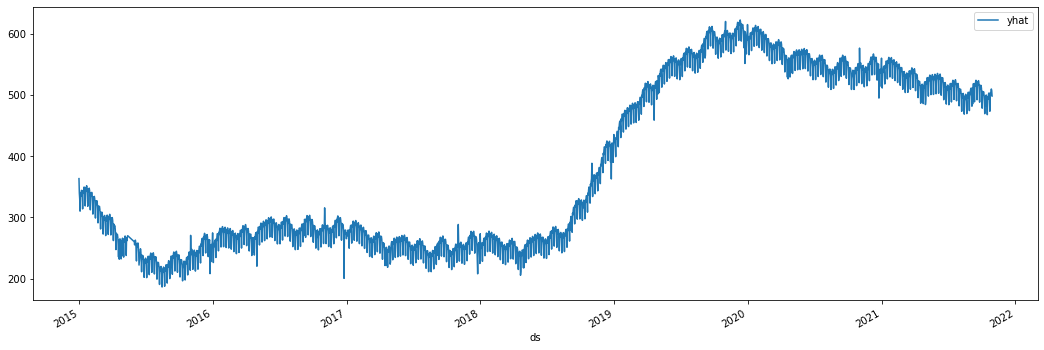

In [132]:
forecast.plot(x='ds',y='yhat', figsize=(18,6))

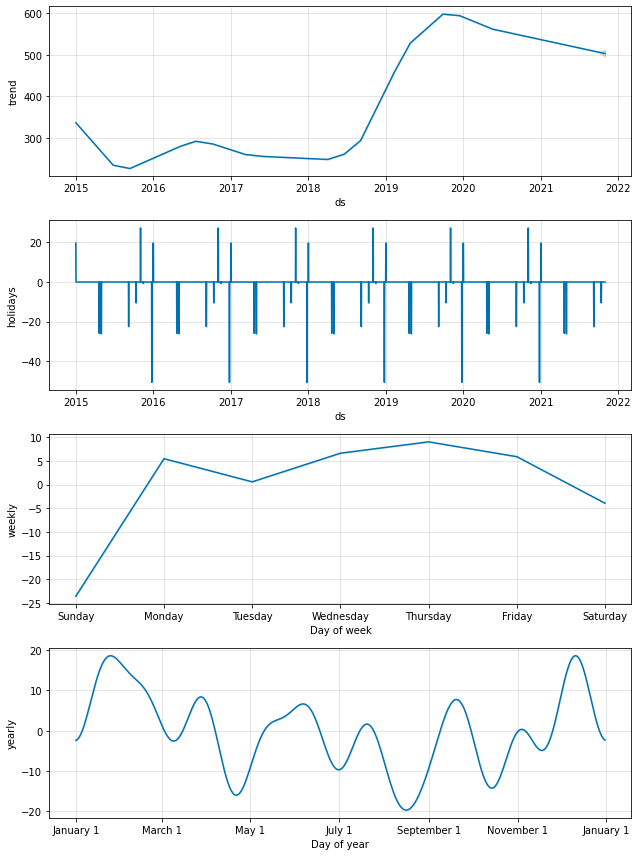

In [133]:
m.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

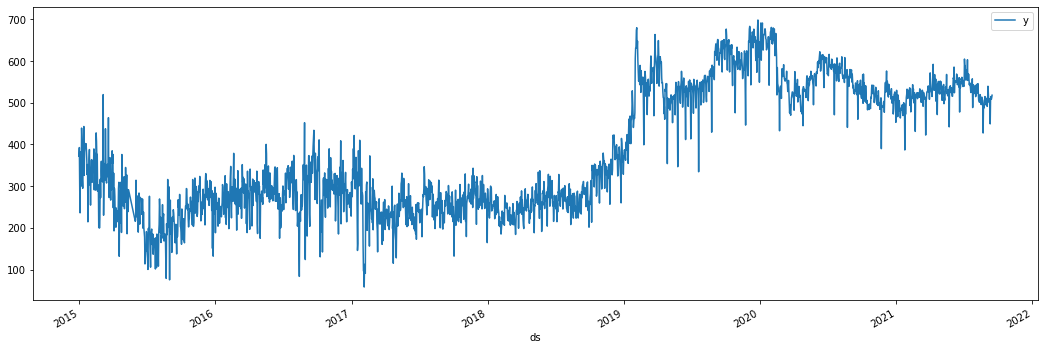

In [134]:
df.plot(x='ds',y='y',figsize=(18,6))

(17532.0, 18628.0)

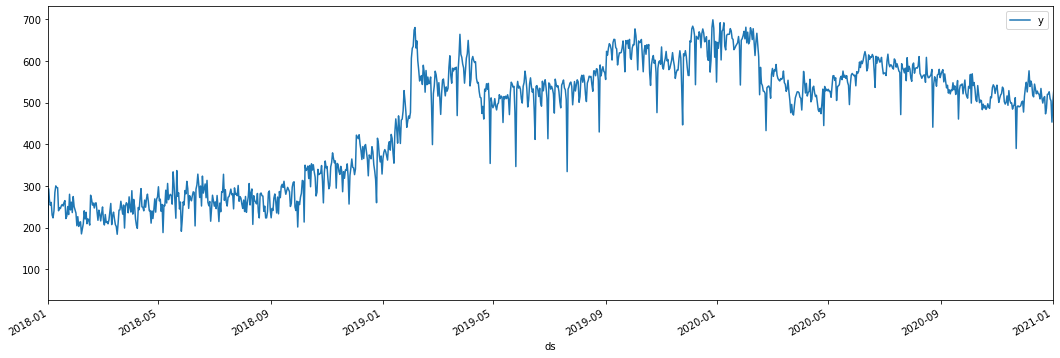

In [135]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.xlim('2018-01-01','2021-01-01')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2428 non-null   datetime64[ns]
 1   y       2428 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.1 KB


In [137]:
df.columns

Index(['ds', 'y'], dtype='object')

In [138]:
train = df.iloc[:-45]

test = df.iloc[-45:]

In [139]:
len(train)

2383

In [140]:
len(test)

45

In [150]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=45,freq='D', include_history=False)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


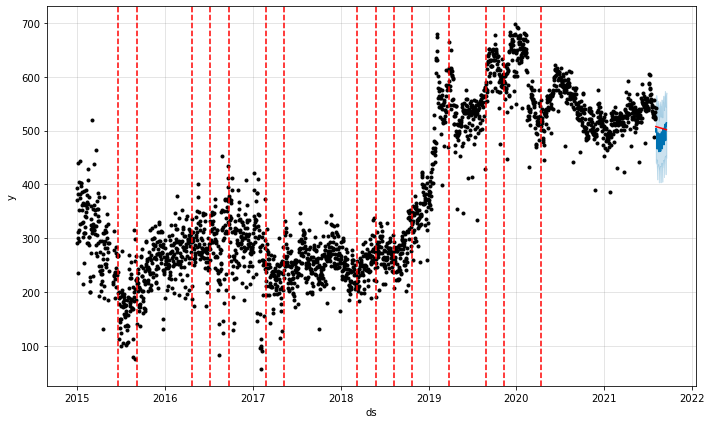

In [151]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#plt.max

In [152]:
from statsmodels.tools.eval_measures import rmse

In [153]:
predictions = np.array(forecast['yhat'])

In [154]:
predictions = [abs(int(i)) for i in predictions] 

In [155]:
predictions[0:5]

[503, 496, 501, 502, 498]

In [156]:
len(test['y'])

45

In [157]:
len(predictions)

45

# Prophet Diagnostics



In [80]:
#from fbprophet.diagnostics import cross_validation,performance_metrics
#from fbprophet.plot import plot_cross_validation_metric

In [81]:
# Initial 2 years training period
#initial = 2 * 365
#initial = str(initial) + ' days'
# Fold every 1 year
#period = 1 * 365
#period = str(period) + ' days'
# Forecast 15 year into the future
#horizon = 15
#horizon = str(horizon) + ' days'

In [82]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [83]:
#df_cv.head()

In [84]:
#performance_metrics(df_cv)

In [85]:
#plot_cross_validation_metric(df_cv, metric='rmse');

In [86]:
#plot_cross_validation_metric(df_cv, metric='mape');

In [158]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [159]:
MAPE(test['y'], predictions)

4.070329390746603

In [160]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test['y'], predictions))

20.763742672766753


In [161]:
rmse(predictions, test['y'])

27.265992036771365

<br>